In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df1_path = '../Computer Vision/Results/All/p1v1_results.csv'
df2_path = '../Computer Vision/Results/np/np1v1_results.csv'

df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)



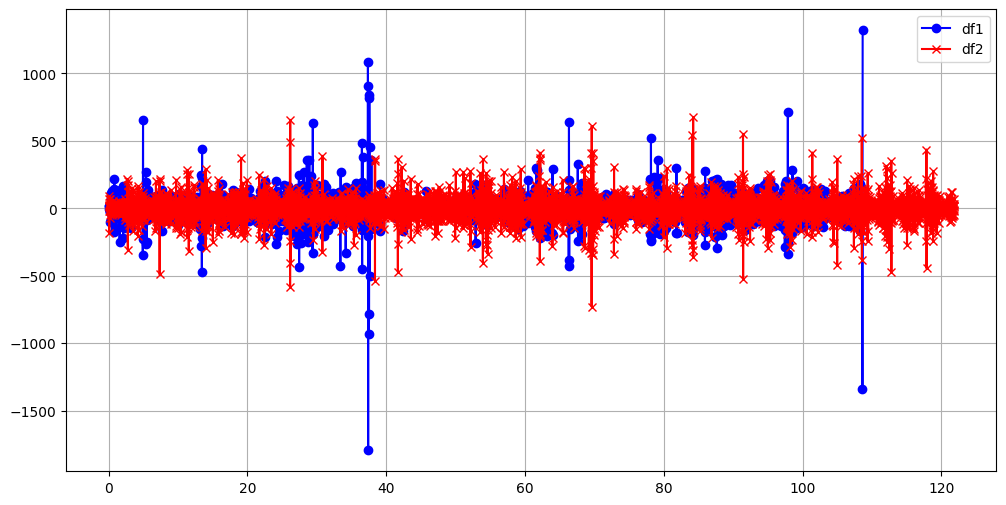

In [3]:
# Graph Analysis of Fog vs Non_fog

x_axis = 'frame_time'
y_axis = 'linear_acceleration'

plt.figure(figsize = (12,6))

plt.plot(df1[x_axis], df1[y_axis], label = 'df1', color = 'blue', marker = 'o')
plt.plot(df2[x_axis], df2[y_axis], label = 'df2', color = 'red', marker = 'x')

plt.legend()
plt.grid(True)
plt.show()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257 entries, 0 to 3256
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            3257 non-null   float64
 1   frame_time           3257 non-null   float64
 2   index                3257 non-null   int64  
 3   right_ankle_x        3257 non-null   float64
 4   right_ankle_y        3257 non-null   float64
 5   right_knee_x         3257 non-null   float64
 6   right_knee_y         3257 non-null   float64
 7   right_hip_x          3257 non-null   float64
 8   right_hip_y          3257 non-null   float64
 9   magnitude1           3257 non-null   float64
 10  magnitude2           3257 non-null   float64
 11  angle_deg            3257 non-null   float64
 12  angular_velocity     3256 non-null   float64
 13  linear_acceleration  3255 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 356.4 KB


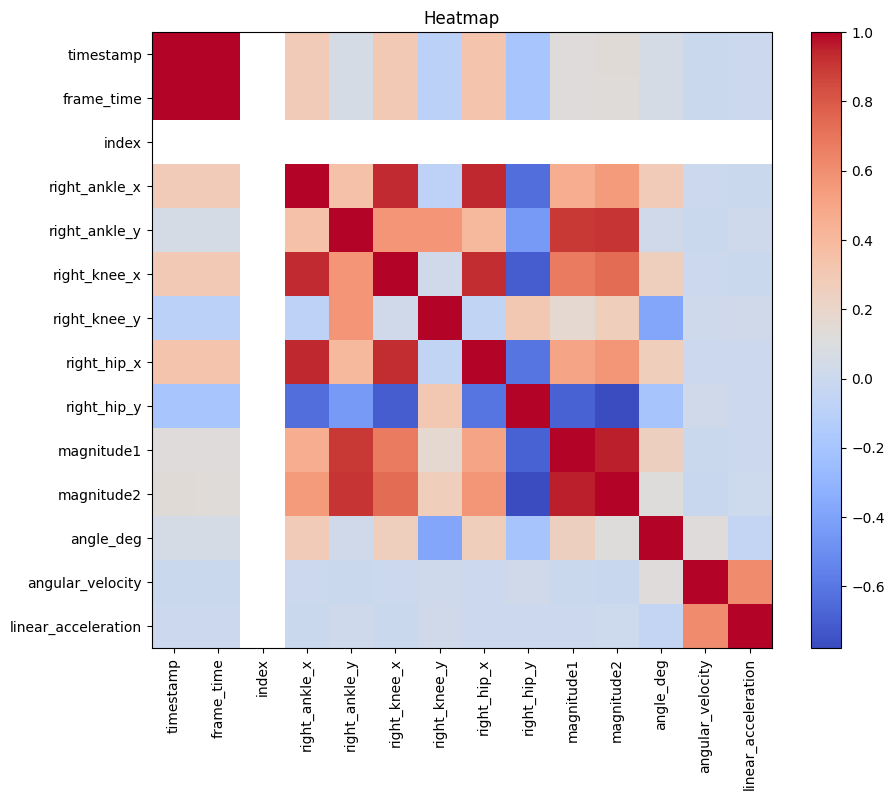

In [5]:
# Heatmap analysis
# Drop columns that have string or object
#column_index = [0,16,13]
#df2 = df2.drop(df2.columns[column_index], axis = 1)

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Plotting the heatmap
plt.figure(figsize = (10,8))
plt.imshow(correlation_matrix, cmap = 'coolwarm', interpolation='none', aspect='auto')
plt.colorbar()

# Add labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Heatmap')
plt.show()

# Heat Map for all_stats_angularAcceleration with other PDFEinfo parameters

In [6]:
# Graphing Heatmap for all_stats_angularAcceleration
df_final = pd.read_csv('../Instructor_Examples/Results/all_stats_angularAcceleration_fogRatio_updrsIII.csv')
df_final_noOutlier = pd.read_csv('../Instructor_Examples/Results/finla_final_final.csv')

## Determine correlations between 'std','FoG Ratio','UPDRS-III'

### Data with outliers

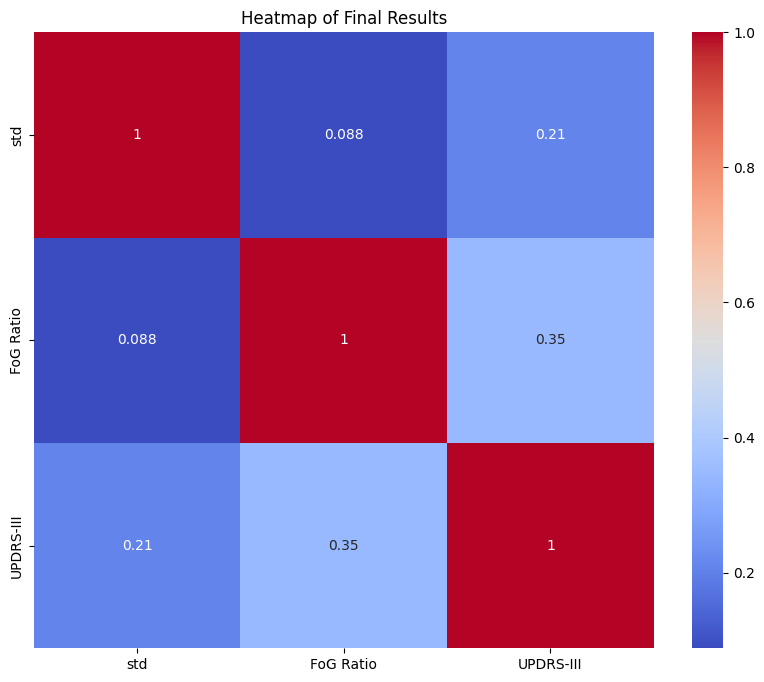

In [7]:
import seaborn as sns
column_to_plot = ['std','FoG Ratio','UPDRS-III']

# Plotting the heatmap
plt.figure(figsize = (10,8))
heatmap_data = df_final[column_to_plot].corr()
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Final Results")
plt.show()


### Data without outliers

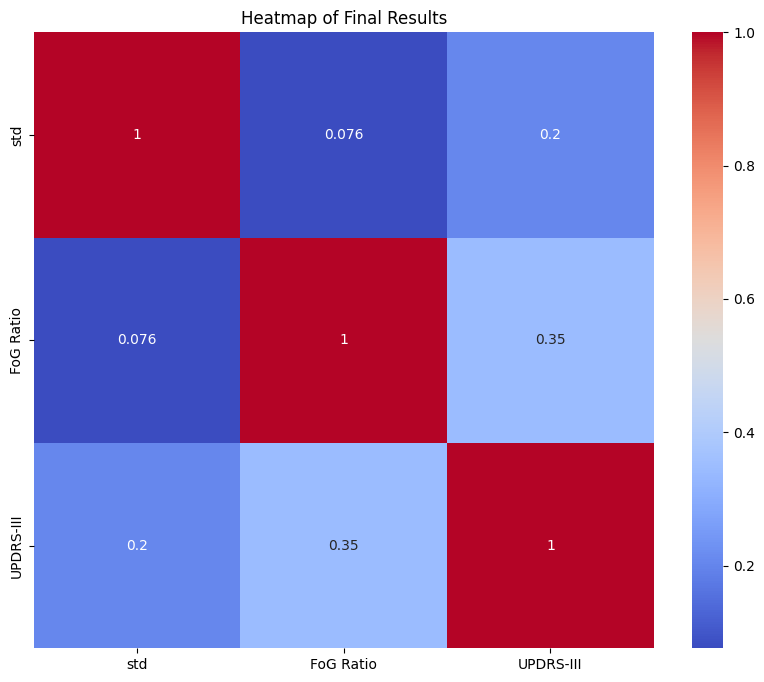

In [8]:
import seaborn as sns
column_to_plot = ['std','FoG Ratio','UPDRS-III']

# Plotting the heatmap
plt.figure(figsize = (10,8))
heatmap_data = df_final_noOutlier[column_to_plot].corr()
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Final Results")
plt.show()

#no difference between no outliers and outliers - linear correlations

## Determine the correlation between all parameters

### Heatmap

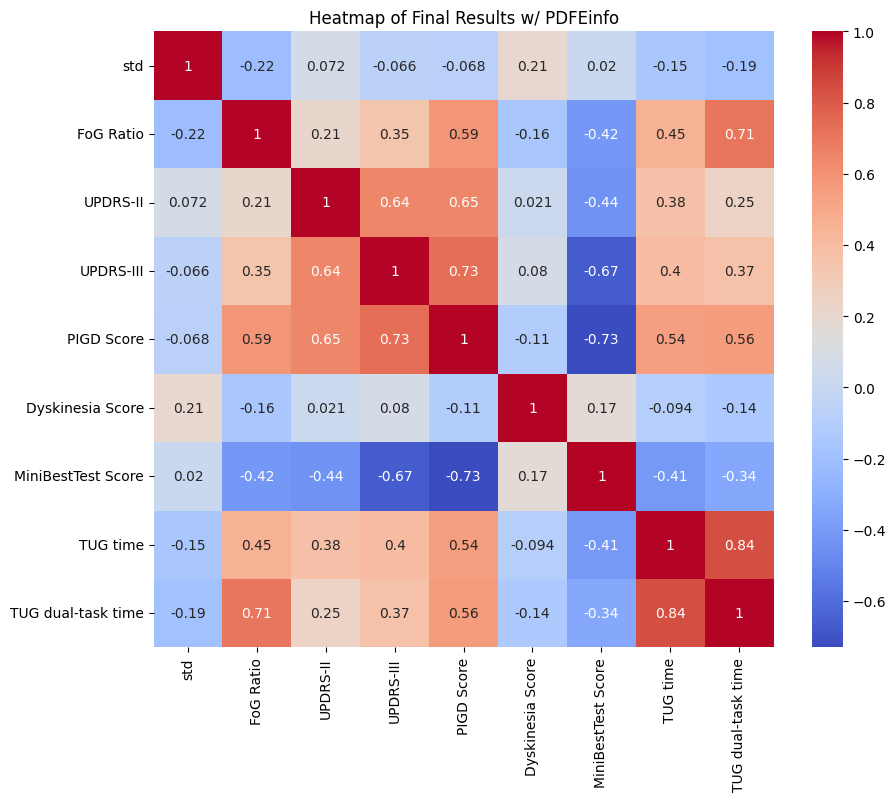

In [9]:
df4 = pd.read_csv('../Instructor_Examples/all_stats_noOutliers_angularAcceleration_fogRatio_updrsIII.csv')
column_to_plot = ['std','FoG Ratio','UPDRS-II', 'UPDRS-III','PIGD Score','Dyskinesia Score','MiniBestTest Score','TUG time','TUG dual-task time']

# Plotting the heatmap
plt.figure(figsize = (10,8))
heatmap_data = df4[column_to_plot].corr()
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Final Results w/ PDFEinfo")
plt.show()

In [10]:
# First remove all other unecessary columns
df4 = df4.drop(['file', 'statistic', 'count', 'mean', 'min', '25%', '50%', '75%', 'max'], axis = 1)



### ML algorithms to determine correlations

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

var_to_pred = 'TUG dual-task time'

df5 = df4[['std', var_to_pred]]

X = df5[['std']]
y = df5[[var_to_pred]]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Create variables for models
linear_model = LinearRegression()
rf_model = RandomForestRegressor()
svr_model = SVR()

# Train the model
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
#svr_model.fit(X_train, y_train)

# Predict the values and determine accuracy
y_prediction = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_prediction)
print(f"Linear Regression MSE: {mse_linear}")

y_prediction = rf_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_prediction)
print(f"Random Forest MSE: {mse_linear}")

#y_prediction = svr_model.predict(X_test)
#mse_linear = mean_squared_error(y_test, y_prediction)
#print(f"SVR MSE: {mse_linear}")

# decisiton tree
# Gradient Boosting Machine
# KNN regression/classifier
# Guassian
# K means clustering
# NN


Linear Regression MSE: 225.82609782418712
Random Forest MSE: 293.66648871866676


/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis/venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### CNN to determien correlation between std and the TUG-Dual task time

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # Output layer for regression

# Compile the model
model.compile(optimizer = Adam(learning_rate=0.01), loss= 'mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32, verbose = 2) #TODO: Change epoch for less loss

# Record the histroy for graphing

# Predict values and accuracy
y_prediction = model.predict(X_test)
mseNN = mean_squared_error(y_test, y_prediction)
print(f"NN MSE: {mseNN}")

# Save the model
model.save('cnn_version1.h5')

Epoch 1/300


/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 - 0s - 196ms/step - loss: 315.6369
Epoch 2/300
2/2 - 0s - 7ms/step - loss: 289.6313
Epoch 3/300
2/2 - 0s - 10ms/step - loss: 186.8914
Epoch 4/300
2/2 - 0s - 9ms/step - loss: 200.4767
Epoch 5/300
2/2 - 0s - 7ms/step - loss: 215.2438
Epoch 6/300
2/2 - 0s - 12ms/step - loss: 183.1850
Epoch 7/300
2/2 - 0s - 11ms/step - loss: 185.4389
Epoch 8/300
2/2 - 0s - 9ms/step - loss: 195.0570
Epoch 9/300
2/2 - 0s - 9ms/step - loss: 185.0418
Epoch 10/300
2/2 - 0s - 9ms/step - loss: 174.0955
Epoch 11/300
2/2 - 0s - 10ms/step - loss: 181.4627
Epoch 12/300
2/2 - 0s - 13ms/step - loss: 184.8473
Epoch 13/300
2/2 - 0s - 9ms/step - loss: 178.5828
Epoch 14/300
2/2 - 0s - 7ms/step - loss: 175.1281
Epoch 15/300
2/2 - 0s - 8ms/step - loss: 179.5563
Epoch 16/300
2/2 - 0s - 8ms/step - loss: 181.3359
Epoch 17/300
2/2 - 0s - 8ms/step - loss: 178.4711
Epoch 18/300
2/2 - 0s - 8ms/step - loss: 174.5212
Epoch 19/300
2/2 - 0s - 8ms/step - loss: 176.5189
Epoch 20/300
2/2 - 0s - 6ms/step - loss: 177.5526
Epoch 21/300
2

NN MSE: 217.88283215377425


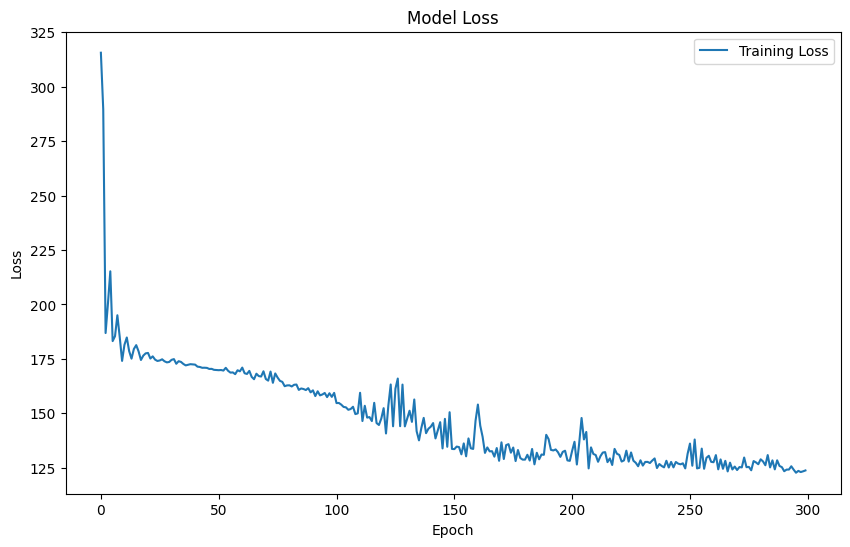

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [14]:
# Example of how to load model after saving its architecure as a .h5 file

from tensorflow.keras.models import load_model

# Load the mode from the HDF5 file
cnnModel = load_model('../Instructor_Examples/cnn_version1.h5')

new_value = 83.57921565783211  # Replace with your actual value

# Ensure the input is a NumPy array and properly shaped
new_input = np.array([[new_value]], dtype=np.float32)

# Make predictios
predictions = model.predict(new_input)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[18.26155]]
